<a href="https://colab.research.google.com/github/jeffheaton/app_generative_ai/blob/main/t81_559_class_09_5_illustrated_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T81-559: Applications of Generative Artificial Intelligence
**Module 9: MultiModal and Text to Image Models**
* Instructor: [Jeff Heaton](https://sites.wustl.edu/jeffheaton/), McKelvey School of Engineering, [Washington University in St. Louis](https://engineering.wustl.edu/Programs/Pages/default.aspx)
* For more information visit the [class website](https://sites.wustl.edu/jeffheaton/t81-558/).

# Module 9 Material

Module 9: MultiModal and Text to Image

* Part 9.1: Introduction to MultiModal and Text to Image [[Video]](https://www.youtube.com/watch?v=lcUsade04pg&ab_channel=JeffHeaton) [[Notebook]](t81_559_class_09_1_image_genai.ipynb)
* Part 9.2: Generating Images with DALL·E Kaggle Notebooks [[Video]](https://www.youtube.com/watch?v=CBfT1y1V1e0&ab_channel=JeffHeaton) [[Notebook]](t81_559_class_09_2_dalle.ipynb)
* Part 9.3: DALL·E Existing Images [[Video]](https://youtube.com/watch?v=5gdaXrJs3Kk&ab_channel=JeffHeaton) [[Notebook]](t81_559_class_09_3_dalle_existing.ipynb)
* Part 9.4: MultiModal Models [[Video]](https://www.youtube.com/watch?v=rYlj9t_wlFA&ab_channel=JeffHeaton) [[Notebook]](t81_559_class_09_4_multimodal.ipynb)
* **Part 9.5: Illustrated Book** [[Video]](https://www.youtube.com/watch?v=TTGen7P3ScU&ab_channel=JeffHeaton) [[Notebook]](t81_559_class_09_5_illustrated_book.ipynb)

# Google CoLab Instructions

The following code ensures that Google CoLab is running and maps Google Drive if needed.

In [12]:
import os

try:
    from google.colab import drive, userdata
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

# OpenAI Secrets
if COLAB:
    os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

# Install needed libraries in CoLab
if COLAB:
    !pip install langchain langchain_openai langchain_community pypdf pdfkit wkhtmltopdf
    !apt-get install wkhtmltopdf

Note: using Google CoLab
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
wkhtmltopdf is already the newest version (0.12.6-2).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


# 3.5: LLM Writes a Book

In a previous module, we built an LLM-based book generator that automated the creation of a book from start to finish. This process included generating a synopsis, outlining the table of contents, and then iteratively writing the chapters into a structured markdown document. Now, we will expand on that work by incorporating DALLE to generate a cover image for the book, adding a visual element to complement the text-based content.

We begin by accessing a large language model with a temperature of 0.7. We use a higher temperature to encourage creativity.

In [13]:
from langchain.chains.summarize import load_summarize_chain
from langchain import OpenAI, PromptTemplate
from langchain_openai import ChatOpenAI
from IPython.display import display_markdown

MODEL = 'gpt-5-mini'

llm = ChatOpenAI(
        model=MODEL,
        temperature=0.7,
        n=1
    )


We create a simple utility function to query the LLM with a custom system prompt. The system prompt tells the LLM that it is assisting in creating a book.

In [14]:
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_core.prompts.chat import (
    ChatPromptTemplate,
    HumanMessagePromptTemplate,
    SystemMessagePromptTemplate,
)
from langchain_openai import ChatOpenAI

def query_llm(prompt):
  messages = [
      SystemMessage(
          content="You are assistant helping to write a book."
      ),
      HumanMessage(
          content=prompt
      ),
  ]

  output = llm.invoke(messages)
  return output.content



In this section, we will expand the functionality of our LLM-based book generator by adding a visual component: a cover image for the book. While our previous work focused on generating a complete markdown document containing the book’s synopsis, table of contents, and chapters, this enhancement introduces the power of DALLE to generate a custom cover image based on the content of the book.

The function render_dalle3 has been added to accomplish this. By leveraging the OpenAI API, we will generate an image using DALLE 3 based on a given prompt, which could be the title or a descriptive aspect of the book. This image is created at the required resolution of 1024x1024 pixels and can be resized to fit any custom dimensions specified by the user. The generated cover image will be saved as a JPEG file, and optionally, it can be displayed using the Python matplotlib library.

This feature not only enriches the generated book with a professional cover but also demonstrates the seamless integration of text and image generation, making the book creation process even more comprehensive and visually appealing.

In [15]:
import io
import requests
from PIL import Image
import matplotlib.pyplot as plt
from openai import OpenAI

def render_dalle3(prompt, filename, height, width):
    # Initialize the OpenAI client
    client = OpenAI()

    # Generate the image using DALL-E 3 at the required 1024x1024 resolution
    response = client.images.generate(
        model="dall-e-3",
        prompt=prompt,
        size="1024x1024",  # DALL-E 3 requires 1024x1024
        quality="standard",
        n=1,
    )

    # Get the image URL from the response
    image_url = response.data[0].url

    # Fetch the image content from the URL
    response2 = requests.get(image_url)
    img = Image.open(io.BytesIO(response2.content))

    # Resize the image to the requested dimensions (height x width)
    img_resized = img.resize((width, height), Image.LANCZOS)

    # Save the resized image
    img_resized.save(filename, "JPEG")

    # Optionally display the resized image
    plt.imshow(img_resized)
    plt.axis('off')  # Hide the axes for a cleaner view
    plt.show()

    return img_resized


## Generate Title, Synopsis and Table of Contents

For this book, we allow the user to specify the subject specified by the SUBJECT variable. We then request the LLM to generate a random title based on this subject. It is essential that the prompt request that the LLM only the; LLMs often like to prefix with text such as "Here is a random title."

In [16]:
SUBJECT = "international spy thriller"

title = query_llm(f"""
Give me a random title for a book on the subject '{SUBJECT}'.
Return only the title, no additional text.
""").strip(" '\"")
print(title)

The Midnight Accord


Now that we have a title, we can request a random synopsis of the book.

In [17]:
synopsis = query_llm(f"""
Give me a synopsis for a book of the title '{SUBJECT}' for a book on the subject '{SUBJECT}'.
Return only the synopsis, no additional text.
""").strip(" '\"")
print(synopsis)

When a covert data packet surfaces on the dark web bearing proof that a multinational security contractor has secretly engineered a global surveillance program, a burned-out CIA analyst named Mara Voss is pulled back into the world she thought she left behind. The packet points to a list of targets—diplomats, dissidents, and heads of state—whose sudden deaths would rearrange the balance of power. As Mara races from the foggy alleys of Istanbul to the neon-lit backstreets of Hong Kong and the snowbound outskirts of Moscow, she assembles an uneasy team: a disgraced MI6 operative hungry for redemption, a hacker with loyalties of her own, and a shadowy informant whose motives are impossible to read.

Every lead reveals a deeper deception, and every ally might be an enemy. Governments stonewall, friendly agencies leak misinformation, and an inscrutable billionaire with ties to the contractor holds the keys to a dormant weapon that can topple economies with a single false flag. With time run

Next, we generate the table of contents. For this generation, we provide all previous information. We also request a particular format for the table of contents. You may notice that I ask for the chapter numbers, even though they are an increasing numeric count and could easily be derived. This process works better because the LLM wants to provide the chapter numbers, and attempts to suppress chapter numbers are often inconsistent. It is easier to allow the LLM to generate chapter numbers but control where it generates them so that I can consistently remove them later.

Cover prompt: Book cover, cinematic photorealistic portrait of a burned-out female CIA analyst (Mara Voss) in a dark coat, half-turned with cigarette smoke and fog curling around her, layered triptych background showing foggy Istanbul alleys with minarets, neon-lit Hong Kong backstreets, and snowbound Moscow outskirts, translucent digital world map with glowing red target nodes connected by thin red thread, ghostly surveillance camera lenses and streaming binary code, a leaking encrypted data packet icon, shadowy silhouettes of a disgraced MI6 operative, a hooded hacker, and an inscrutable billionaire blurred into the background, tense noir mood, cold blues and greys with neon cyan and magenta accents, high contrast rim lighting, gritty texture, cinematic depth of field, moody atmosphere, negative space at top for title, spine-safe composition, ultra-detailed, 4k, photorealistic, fine art book cover quality


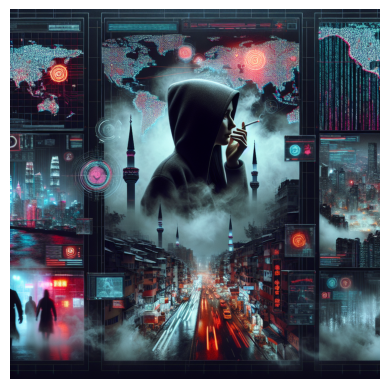

In [18]:
cover_prompt = query_llm(f"Give me a stable diffusion prompt for the cover of a book with the following synopsis:"
                         f"Return only the prompt, no extra text."
                f"{synopsis}")
print(f"Cover prompt: {cover_prompt}")
# Get the current working directory
current_directory = os.getcwd()
# Combine the directory with the file name to get the absolute path
file_path = os.path.join(current_directory, "cover.jpg")
image = render_dalle3(cover_prompt, file_path, 768, 768)

In [19]:
toc = query_llm(f"""
Give me a table of contents for a book of the title '{title}' for a book on
the subject '{SUBJECT}' the book synopsis is '{synopsis}'.
Return the table of contents as a list of chapter titles.
Separate the chapter number and chapter title with a pipe character '|'.
Return only the chapter names, no additional text.
At most 12 chapters.
""").strip(" '\"")
print(toc)

1 | Packet at Midnight
2 | Back from the Ashes
3 | Targets and Threads
4 | Fog and Glass
5 | The Fallen Crown
6 | Ghost in the Grid
7 | Snow and Silence
8 | The Man with a Key
9 | Breach Inside
10 | The False Flag
11 | The Midnight Accord
12 | Aftermath and Remaining Ghosts


We must now parse the table of contents and remove the pipes and chapter numbers.

In [20]:
# Split the string into lines
lines = toc.splitlines()

# Extract titles using list comprehension
toc2 = [line.split('|')[1].strip() for line in lines if line]

# Print the list of titles
print(toc2)

['Packet at Midnight', 'Back from the Ashes', 'Targets and Threads', 'Fog and Glass', 'The Fallen Crown', 'Ghost in the Grid', 'Snow and Silence', 'The Man with a Key', 'Breach Inside', 'The False Flag', 'The Midnight Accord', 'Aftermath and Remaining Ghosts']


## Generate the Chapters of the Book

Next, we create a function capable of producing the text that makes up a chapter. To ensure that the function has enough context to generate each chapter, we provide the synopsis, the table of contents, and the chapter number. To test this code, we request that it develop a single chapter.

In [21]:
def render_chapter(num, chapter_title, title, subject, synopsis, toc):
  txt = query_llm(f"""
  Write Chapter {num}, titled "{chapter_title}" for a book of the title '{title}' for a book on
  the subject '{subject}' the book synopsis is '{synopsis}' the table of contents is '{toc}'.
  Give me only the chapter text, no chapter heading, no chapter title, number, no additional text.
  """).strip(" '\"")
  return txt

txt = render_chapter(1, toc2[0], title, SUBJECT, synopsis, toc)
print(txt)

The rain that night fell in long, defiant threads, as if the city itself were reluctant to be seen. Neon gave the wet pavement color, sodium lamps bled halos into the fog, and the windows of Mara Voss’s one-bedroom apartment made little planets of the rooms across the street. She watched them through a rim of steam on her mug, the heat gone from the coffee and most of the pleasures of small, quiet things. Silica dust on everything, she thought—memory of the servers, of rooms that hummed like sleeping engines. Even her books smelled faintly of fluorescent light.

She had told herself she was done. Ten years in analysis had burned away the shine—fashioned a second skin of cynicism that didn't care for the grand, the noble, the necessary anymore. It had been nice, once, to believe intelligence could prevent the next catastrophe. Then she had seen the careful edits, the compromised reports, the memos that folded power around private interests. She had watched her work become a commodity, p

We can now generate the entire book in Markdown, which allows some formatting. We begin by rendering the title and synopsis, the table of contents, and each chapter.

In [22]:
import base64

book = ""

# Render the title
book += f"# {title}\n"

# Read and encode the image as base64
with open(file_path, "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode('utf-8')

# Render the book cover
book = f"# {title}\n<img src='data:image/jpeg;base64,{encoded_string}' alt='title'>\n\n"
book += f"## Synopsis\n\n{synopsis}\n\n"

# Render the toc
book += f"\n## Table of Contents\n\n"
num = 1
for chapter_title in toc2:
  book += f"{num}. {chapter_title}\n"
  num += 1


# Render the book
chapter = 1
for chapter_title in toc2:
  print(f"Rendering chapter {chapter}/{len(toc2)}: {chapter_title}")
  txt = render_chapter(chapter, chapter_title, title, SUBJECT, synopsis, toc)
  book += f"\n\n## Chapter {chapter}: {chapter_title}\n"
  book += f"{txt}\n"
  chapter += 1


Rendering chapter 1/12: Packet at Midnight
Rendering chapter 2/12: Back from the Ashes
Rendering chapter 3/12: Targets and Threads
Rendering chapter 4/12: Fog and Glass
Rendering chapter 5/12: The Fallen Crown
Rendering chapter 6/12: Ghost in the Grid
Rendering chapter 7/12: Snow and Silence
Rendering chapter 8/12: The Man with a Key
Rendering chapter 9/12: Breach Inside
Rendering chapter 10/12: The False Flag
Rendering chapter 11/12: The Midnight Accord
Rendering chapter 12/12: Aftermath and Remaining Ghosts


## Generate a PDF of the Book

Now that we have generated the book, we have saved it as a PDF.

In [23]:
import markdown
import pdfkit

# Convert Markdown to HTML
html = markdown.markdown(book)
options = {
    'encoding': "UTF-8",  # Ensures UTF-8 encoding
}

pdfkit.from_string(html, 'output.pdf', options=options)

True

We can now download the generated book.

In [24]:
from google.colab import files
files.download("output.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>